# Generate x_train, x_test, y_train, y_test

In [38]:
import numpy as np
folder = '../../input/numpy/2000-samples/'
x = np.load(folder+'x_flatten.npy')
y = np.load(folder+'y.npy')

# Generate Train and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
	x,
	y,
	test_size=0.33,
	random_state=4,
	stratify=y
)

print(f"""
x_train\t is \t{x_train.shape}
x_test\t is \t{x_test.shape}
y_train\t is \t{y_train.shape}
y_test\t is \t{y_test.shape}

x_train takes up {x_train.nbytes/1e9:,.2f} GB of memory
""")



x_train	 is 	(1340, 195075)
x_test	 is 	(660, 195075)
y_train	 is 	(1340,)
y_test	 is 	(660,)

x_train takes up 0.26 GB of memory



# K-NN

## Basic K-NN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
import os
import pickle

models_folder = 'models'

In [40]:
from scipy.sparse import issparse

# Assuming x_train is your input data
is_sparse = issparse(x_train)

if is_sparse:
    print("Input data is sparse")
else:
    print("Input data is not sparse")


Input data is not sparse


In [41]:
# Create/Load Model
n_neighbors=5

shared_title = f'{n_neighbors}-{len(y)}'
if not os.path.exists(models_folder): os.makedirs(models_folder)

title = f'{shared_title}-NN_simple.pkl'
file = f'{models_folder}/{title}'
if title not in os.listdir(models_folder):
	model = KNeighborsClassifier(
		n_neighbors=n_neighbors,
		n_jobs=-1,
		algorithm='kd_tree',
	)
	model.fit(
		x_train, 
		y_train
	)
	with open(file, 'wb') as f:
		pickle.dump(model, f)
else:
	with open(file, 'rb') as f: model = pickle.load(f)

model.effective_metric_, model.algorithm

('euclidean', 'auto')

In [42]:
# Find Accuracy

title = f'{shared_title}-NN_simple_acc.pkl'
file = f'{models_folder}/{title}'
if title not in os.listdir(models_folder):
	acc = model.score(
		x_test, 
		y_test
	)
	# pickle accuracy
	with open(file, 'w') as f:
		f.write(str(acc))
else:
	with open(file, 'r') as f: acc = float(f.read())

print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 92.42%


In [43]:
# Generate Y predictions

title = f'{shared_title}-NN_simple_pred.pkl'
file = f'{models_folder}/{title}'
if title not in os.listdir(models_folder):
	y_pred = model.predict(x_test)
	with open(file, 'wb') as f:
		pickle.dump(y_pred, f)
else:
	with open(file, 'rb') as f: y_pred = pickle.load(f)

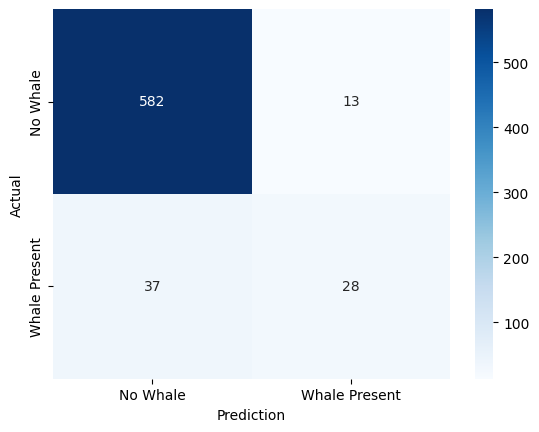

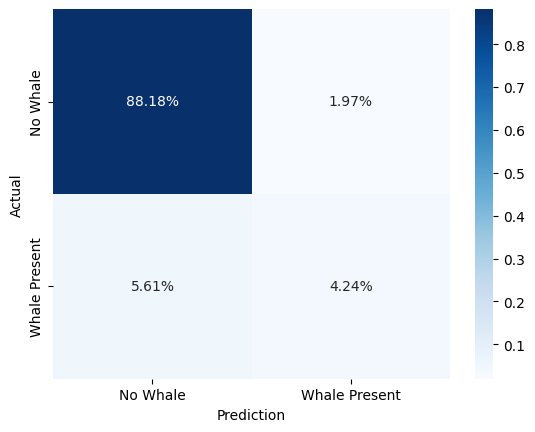

In [44]:
# Generate Matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
labels = ['No Whale','Whale Present']

sns.heatmap(
	cf_matrix, 
	annot=True,
	fmt='d',
	xticklabels=labels,
	yticklabels=labels,
	cmap='Blues'
).set(
	xlabel='Prediction',
	ylabel='Actual'
)
plt.show()

sns.heatmap(
	cf_matrix/np.sum(cf_matrix), 
	annot=True,
	fmt='.2%',
	xticklabels=labels,
	yticklabels=labels,
	cmap='Blues'
).set(
	xlabel='Prediction',
	ylabel='Actual'
)
plt.show()


Using K-NN on 2000 samples:
- If there is a whale present, there is only a 50% chance of identifying it.
- If there is no whale present, there is only a 2% chance that the algorithm incorrectly identifies a whale.

Using K-NN on 30000 samples (all samples):
- If there is a whale present, there is only a 75% chance of identifying it.
- If there is no whale present, there is a 10% chance that the algorithm incorrectly identifies a whale.

## KD-Tree

done by default, it won't let me specify, bring up in office hours

## Cross-validation to find the best k